## Imports

In [1]:
import scvi
import anndata
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import scipy
import os
import h5py
import time
import mplscience
import psutil
try:
    from anndata.experimental import read_elem
except ImportError:
    from anndata._io.specs import read_elem

# plotting commands for the styling
# sns.reset_orig()
mplscience.set_style(reset_current=True, name="default")

%load_ext memory_profiler
%load_ext autoreload
%autoreload 2

Global seed set to 0


## Mem savings

In [2]:
n_genes = [2000]
# n_cells = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
n_cells = [10000]
noise_ratio = [0.05, 0.1, 0.3, 0.5, 0.7] # higher means less sparse
# Example: TS Bladder is n_obs × n_vars = 24583 × 4000, sparsity = 72.06

local_dir = "/Users/valehvpa/GitRepos/scvi-hub-reproducibility/local/benchmarking"

In [3]:
for ng in n_genes:
    for nc in n_cells:
        for r in noise_ratio:
            # generate data
            adata = scvi.data.synthetic_iid(n_batches=int(nc/200), n_genes=ng, n_proteins=0, sparse=True, noise_ratio=r)
            adata.write_h5ad(f"{local_dir}/orig_{nc}_cells_{ng}_genes_{r}_noise.h5ad")
            # train model
            scvi.model.SCVI.setup_anndata(
                adata,
                batch_key="batch",
                labels_key="labels",
            )
            model = scvi.model.SCVI(adata)
            model.train(max_epochs=1)
            # minify data
            qzm, qzv = model.get_latent_representation(give_mean=False, return_dist=True)
            model.adata.obsm["X_latent_qzm"] = qzm
            model.adata.obsm["X_latent_qzv"] = qzv
            model.minify_adata()
            model.adata.write_h5ad(f"{local_dir}/minified_{nc}_cells_{ng}_genes_{r}_noise.h5ad")

/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.55s/it, loss=1.53e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.56s/it, loss=1.53e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.60s/it, loss=2.18e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.60s/it, loss=2.18e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=3.76e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it, loss=3.76e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, loss=5.04e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=5.04e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(


In [3]:
def get_size_in_mb(filepath):
    return np.round(os.stat(filepath).st_size / 2**20, 1)

def get_n_cells_genes(filepath):
    with h5py.File(filepath) as fp:
        n_cells, n_genes = len(read_elem(fp["obs"])), len(read_elem(fp["var"]))
    return n_cells, n_genes

def get_sparsity(adata):
    all_counts = adata.shape[0] * adata.shape[1]
    if isinstance(adata.X, scipy.sparse.csr_matrix):
        nz = adata.X.count_nonzero()
    else:
        nz = np.count_nonzero(adata.X)
    return np.round(100 * (all_counts - nz) / all_counts, 1)

In [4]:
process = psutil.Process(os.getpid())

df = pd.DataFrame(columns = ["n_cells", "n_genes", "sparsity %",
"orig RAM (MiB)", "minified RAM (MiB)", "orig disk (MiB)", "minified disk (MiB)",
"pct diff RAM (MiB)", "pct diff disk (MiB)"])

gc.collect()
for ng in n_genes:
    for nc in n_cells:
        for r in noise_ratio:
            orig_path = f"{local_dir}/orig_{nc}_cells_{ng}_genes_{r}_noise.h5ad"
            minified_path = f"{local_dir}/minified_{nc}_cells_{ng}_genes_{r}_noise.h5ad"

            # get minified_ram
            start_mem = process.memory_info().rss
            adata = anndata.read_h5ad(minified_path)
            end_mem = process.memory_info().rss
            # print("mini: " + str((end_mem - start_mem) / 2**20))
            minified_ram = ((end_mem - start_mem) / 2**20)/nc
            del adata
            gc.collect()

            # get orig_ram
            start_mem = process.memory_info().rss
            adata = anndata.read_h5ad(orig_path)
            end_mem = process.memory_info().rss
            # print("orig: " + str((end_mem - start_mem) / 2**20))
            orig_ram = ((end_mem - start_mem) / 2**20)/nc
            # don't delete adata yet as we still need it

            # get orig_disk and minified_disk
            orig_disk = get_size_in_mb(orig_path)/nc
            minified_disk = get_size_in_mb(minified_path)/nc

            # get percentage differences
            if orig_ram == 0:
                orig_ram = 1e-10
            pct_diff_ram = 100*((orig_ram - minified_ram)/orig_ram)
            pct_diff_disk = 100*((orig_disk - minified_disk)/orig_disk)

            # add everything to df
            df.loc[len(df)] = [
                nc,
                ng,
                get_sparsity(adata),
                orig_ram,
                minified_ram,
                orig_disk,
                minified_disk,
                pct_diff_ram,
                pct_diff_disk,
            ]

            # cleanup for the next round
            del adata
            gc.collect()

df["sparsity %"] = df["sparsity %"].astype(int)

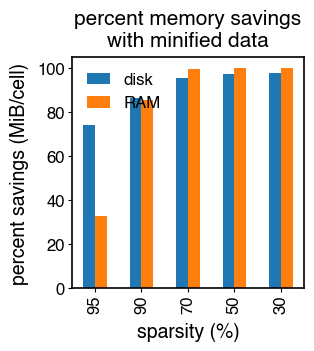

In [7]:
df["sparsity %"] = df["sparsity %"].astype(int)

title = "percent memory savings\nwith minified data"
ax = df.plot.bar(x = "sparsity %", y = ["pct diff disk (MiB)", "pct diff RAM (MiB)"], figsize=(3,3), legend=True, title=title,layout="constrained")
ax.set_xlabel("sparsity (%)")
ax.set_ylabel("percent savings (MiB/cell)")
ax.legend(['disk', 'RAM'])
# ax.axhline(y=df["pct diff disk (MiB)"].mean(), color='blue', linestyle="--", alpha=0.5)
# ax.axhline(y=df["pct diff RAM (MiB)"].mean(), color='orange', linestyle="--", alpha=0.5)

temp_fig_dir = "/Users/valehvpa/GitRepos/scvi-hub-reproducibility/local/temp_figs"
fig_path = f'{temp_fig_dir}/mem_benchmark.svg'
plt.savefig(fig_path, dpi=300, bbox_inches="tight")

## Time savings

In [11]:
n_genes = [2000]
n_cells = [10000]
nl = 1
nll = 5
batch_sizes = [2**i for i in range(6, 15)]

df = pd.DataFrame(columns = ["exp_id", "n_cells", "n_genes", "batch_size",
"ms/cell - orig", "ms/cell - minified", "ms/cell pct diff"])

for j in range(nll):
    for ng in n_genes:
        for nc in n_cells:
            for bsize in batch_sizes:
                # generate data
                adata = scvi.data.synthetic_iid(n_batches=int(nc/200), n_genes=ng, n_proteins=0, sparse=True)
                # train model
                scvi.model.SCVI.setup_anndata(
                    adata,
                    batch_key="batch",
                    labels_key="labels",
                )
                model = scvi.model.SCVI(adata)
                model.train(max_epochs=1)
                start_time = time.time()
                for i in range(nl):
                    model.get_likelihood_parameters(n_samples=1, give_mean=True, batch_size=bsize)
                end_time = time.time()
                mspc_orig = 1000*((end_time - start_time)/adata.n_obs)/nl
                # minify data
                qzm, qzv = model.get_latent_representation(give_mean=False, return_dist=True)
                model.adata.obsm["X_latent_qzm"] = qzm
                model.adata.obsm["X_latent_qzv"] = qzv
                model.minify_adata()
                # get likelihood parameters with minified data and time it
                start_time = time.time()
                for i in range(nl):
                    model.get_likelihood_parameters(n_samples=1, give_mean=True, batch_size=bsize)
                end_time = time.time()
                mspc_minified = 1000*((end_time - start_time)/adata.n_obs)/nl
                # get percentage difference in seconds/cell
                pct_diff = 100*((mspc_orig - mspc_minified)/mspc_orig)
                # add time diff to df
                df.loc[len(df.index)] = [j, nc, ng, bsize, mspc_orig, mspc_minified, pct_diff]

df.batch_size = df.batch_size.astype(int)

/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.79s/it, loss=6.12e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it, loss=6.12e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.86s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.60s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it, loss=6.12e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it, loss=6.12e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.72s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.72s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.77s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.12e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.12e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, loss=6.12e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, loss=6.12e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.60s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.56s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.56s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.69s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.75s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.71s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it, loss=6.12e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it, loss=6.12e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.69s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it, loss=6.12e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it, loss=6.12e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it, loss=6.14e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it, loss=6.14e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(
/Users/valehvpa/GitRepos/scvi-tools/scvi/data/_built_in_data/_synthetic.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data)
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/scvi-hub-clone/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available 

Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it, loss=6.13e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 1/1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it, loss=6.13e+03, v_num=1]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Generating sequential column names                                                                        
INFO     Generating sequential column names                                                                        


/Users/valehvpa/GitRepos/scvi-tools/scvi/model/utils/_minification.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  bdata = AnnData(


In [12]:
# average over nll experiments
df_mean = df.groupby(["batch_size"]).mean()
df_mean["batch_size"] = df_mean.index

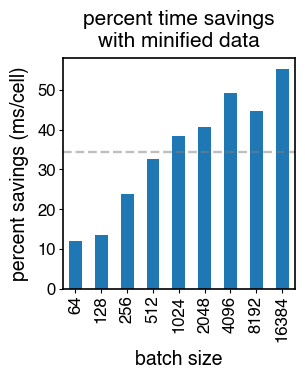

In [13]:
title = "percent time savings\nwith minified data"
ax = df_mean.plot.bar(x = "batch_size", y = "ms/cell pct diff", figsize=(3,3), legend=False, title=title)
ax.set_xlabel("batch size")
ax.set_ylabel("percent savings (ms/cell)")
ax.axhline(y=df_mean["ms/cell pct diff"].mean(), color='grey', linestyle="--", alpha=0.5)
# df.plot.line(x = "batch_size", y = "ms/cell pct diff")

temp_fig_dir = "/Users/valehvpa/GitRepos/scvi-hub-reproducibility/local/temp_figs"
fig_path = f'{temp_fig_dir}/time_benchmark.svg'
plt.savefig(fig_path, dpi=300, bbox_inches="tight")